<a href="https://colab.research.google.com/github/cruzdariel/OCPSAllDataLeaderView2024/blob/colab/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIbM9xMoM7XWvpmPRPtAsMnIyVLvlaWopGF7k4GtYNBTL1Uj7OfMktStIUKlsRKYgcmg&usqp=CAU"></img>

# Analysis of OCPSAllDataLeaderView.csv

### Privacy Disclaimer

 This Jupyter Notebook contains sensitive and confidential information that includes data protected under Florida's Sunshine Laws. Unauthorized disclosure, distribution, or copying of this data is strictly prohibited. **This document is intended solely for the use of the authorized recipient(s) and is not for public disclosure.**

If you are not the intended recipient, please notify the sender immediately, delete this notebook from your system, and do not disclose its contents to any other person, use it for any purpose, or store or copy any of the information contained herein.

By accessing and using this notebook, you agree to comply with all applicable confidentiality and data protection laws and policies.


### Attributions
(C) Dariel Cruz Rodriguez, 2024, under work for Orange County Public Schools.



---

### Code


In [4]:
pip install adjustText

In [55]:
# Modules utilized in this code
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import statsmodels.api as sm

In [10]:
# Defining data sources
url = "https://raw.githubusercontent.com/cruzdariel/OCPSAllDataLeaderView2024/main/OrangeCountyPublicSchoolsAllDataLeadershipView10Jun2024.csv?token=GHSAT0AAAAAACP7WCJ2NFMSAXN66VNQ4Q3KZTTUFXQ"

df = pd.read_csv(url) # All schools
df = df[~df['Name'].isin([
    "OCVS VIRTUAL INSTRUCTION COURSE OFFERING",
    "ORANGE CENTER ELEMENTARY",
    "TIMBER LAKES ELEMENTARY",
    "ACCESS AND OPPORTUNITY",
    "ACCOUNTS PAYABLE",
    "CURRICULUM & DIGITAL LEARNING",
    "CURRICULUM AND INSTRUCTION",
    "CUSTODIAL SERVICES",
    "DISTRICT POLICE and PROTECTIVE SERVICES",
    "ELEMENTARY SCHOOLS",
    "EMPLOYMENT SERVICES",
    "ENVIRONMENTAL COMPLIANCE AND SUSTAINABIL",
    "ESE INSTRUCTIONAL SUPPORT",
    "ESE POL & PRO & SUP SVC NONPUB",
    "ESE POL & PROCEDURES PUB K12",
    "ESE SPEC PROG & BEHAVIOR SUPP",
    "ESE SUPPLEMENTAL SERVICES",
    "FACILITIES SERVICES CONSTRUCTION",
    "FACILITIES SVC MAINTENANCE and FACILITIE",
    "FEDERAL PROGRAMS",
    "FINANCE",
    "FOOD AND NUTRITION SERVICES",
    "GROUNDS LANDSCAPING AND PEST CONTROL SVC",
    "HR COMPLIANCE",
    "ITS CUSTOMER CARE",
    "ITS ENTERPRISE PROJECTS",
    "ITS INFRASTRUCTURE",
    "MAINTENANCE NORTHEAST",
    "MAINTENANCE NORTHWEST",
    "MAINTENANCE SOUTH",
    "MULTILINGUAL SERVICES",
    "OFFICE OF MANAGEMENT AND BUDGET",
    "PAYROLL SERVICES",
    "PROCUREMENT SVCS AND FAC CONST CONTRACT",
    "PROFESSIONAL LEARNING",
    "PROFESSIONAL STANDARDS",
    "PSYCHOLOGICAL & SOCIAL SERVICES",
    "PUBLIC RELATIONS",
    "RESEARCH, MEASUREMENT AND STRATEGY",
    "RISK MANAGEMENT",
    "SCHOOL CHOICE SERVICES",
    "SCHOOL TRANSFORMATION OFFICE",
    "STUDENT ENROLLMENT",
    "STUDENT INFORMATION SYSTEMS AND PROJECTS",
    "STUDENT SERVICES",
    "TRANSPORTATION ADMINISTRATION",
    "TRANSPORTATION STUDENT SVCS",
    "TRANSPORTATION SUPPORT SERVICES",
    "VOCATIONAL TECHNICAL EDUCATION",
    "AMIKIDS ORLANDO",
    "OCVS VIRTUAL INSTRUCTION PROGRAM",
    "HOSPITAL HOMEBOUND",
    "BETA",
    "ESE TRANSITION",
    "RANDALL ACADEMY",
    "SIMON YOUTH FOUND ACAD AT OUTLET MKTPLCE",
    "ORANGE TECHNICAL COLLEGE MID FLORIDA CMP",
    "ORANGE TECHNICAL COLLEGE ORLANDO CAMPUS",
    "ORANGE TECHNICAL COLLEGE WESTSIDE CAMPUS",
    "ORANGE TECHNICAL COLLEGE WINTER PARK CMP",
    "ORANGE YOUTH ACADEMY",
    "PACE CENTER FOR GIRLS",
    "MAGNOLIA",
    "UNIVERSAL EDUCATION CENTER",
    "POSITIVE PATHWAYS TRANSITION CENTER",
    "ESTEEM ACADEMY",
    "SILVER PINES ACADEMY K12 LEARNING CENTER",
    "ACCELERATION EAST",
    "ACCELERATION WEST",
    "OCVS VIRTUAL FRANCHISE"
])] # Filterning non traditional K12

df_district2 = df[df['Name'].isin(['LAKE NONA HIGH', 'COLONIAL HIGH'])] # District 2 Schools
df_notdistrict2 = df[~df['Name'].isin(['LAKE NONA HIGH', 'COLONIAL HIGH'])] # Non District 2 Schools

colonial_hs = df[df['Name'] == 'COLONIAL HIGH']
lake_nona_hs = df[df['Name'] == 'LAKE NONA HIGH']

hs = {'avg_rigor': np.mean(df['Rigorous Expectations']),
      'avg_rigor_notd2': np.mean(df_notdistrict2['Rigorous Expectations']),
      'avg_schoolclimate': np.mean(df['School Climate']),
      'avg_schoolclimate_notd2': np.mean(df_notdistrict2['School Climate']),
      'avg_selfmanagement': np.mean(df['Self-Management']),
      'avg_selfmanagement_notd2': np.mean(df_notdistrict2['Self-Management']),
      'avg_senseofbelonging': np.mean(df['Sense of Belonging']),
      'avg_senseofbelonging_notd2': np.mean(df_notdistrict2['Sense of Belonging']),
      'average_teacherstudentrelationships':np.mean(df['Teacher-Student Relationships']),
      'average_teacherstudentrelationships_notd2': np.mean(df_notdistrict2['Teacher-Student Relationships'])}

ms = {'avg_rigor': np.mean(df['Rigorous Expectations.1']),
      'avg_rigor_notd2': np.mean(df_notdistrict2['Rigorous Expectations.1']),
      'avg_schoolclimate': np.mean(df['School Climate.1']),
      'avg_schoolclimate_notd2': np.mean(df_notdistrict2['School Climate.1']),
      'avg_selfmanagement': np.mean(df['Self-Management.1']),
      'avg_selfmanagement_notd2': np.mean(df_notdistrict2['Self-Management.1']),
      'avg_senseofbelonging': np.mean(df['Sense of Belonging.1']),
      'avg_senseofbelonging_notd2': np.mean(df_notdistrict2['Sense of Belonging.1']),
      'average_teacherstudentrelationships':np.mean(df['Teacher-Student Relationships.1']),
      'average_teacherstudentrelationships_notd2': np.mean(df_notdistrict2['Teacher-Student Relationships.1'])}

In [11]:
pd.set_option('display.max_columns', 1000)
df.describe()

,(9-12),Rigorous Expectations,School Climate,Self-Management,Sense of Belonging,Teacher-Student Relationships,(6-8),Rigorous Expectations.1,School Climate.1,Self-Management.1,Sense of Belonging.1,Teacher-Student Relationships.1,Staff,Belonging,Feedback and Coaching,Resources,School Climate.2,School Leadership,Teacher,Belonging.1,Feedback and Coaching.1,Resources.1,School Climate.3,School Leadership.1,Teacher Self-Reflection,Teaching Efficacy,Central Office,Department Climate,Department Leadership,Feedback and Coaching.2,Resources.2,Spring 2024 Family Survey,Barriers to Engagement,School Climate.4,School Fit
count,0.0,22.000000,22.000000,22.000000,22.000000,22.000000,0.0,50.000000,50.000000,50.000000,50.000000,50.000000,0.0,200.000000,200.000000,200.000000,200.000000,200.000000,0.0,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,0.0,0.0,0.0,0.0,0.0,201.00000,201.000000,201.000000
mean,NaN,51.863636,31.590909,68.909091,32.727273,40.500000,NaN,59.080000,34.280000,65.400000,37.720000,46.200000,NaN,74.050000,60.965000,47.980000,66.975000,72.290000,NaN,70.741294,58.139303,44.611940,59.567164,63.069652,81.671642,78.208955,NaN,NaN,NaN,NaN,NaN,NaN,82.38806,79.417910,73.746269
std,NaN,3.562977,6.044747,3.490246,5.156428,3.839023,NaN,5.605537,7.114343,6.321328,6.676306,7.556589,NaN,11.620788,13.343313,13.094922,15.430648,14.969513,NaN,10.901502,13.751382,12.328774,14.062244,16.110094,6.796443,6.480441,NaN,NaN,NaN,NaN,NaN,NaN,7.10413,11.823049,11.555531
min,NaN,44.000000,21.000000,64.000000,23.000000,32.000000,NaN,48.000000,23.000000,51.000000,27.000000,32.000000,NaN,36.000000,27.000000,14.000000,23.000000,26.000000,NaN,47.000000,23.000000,19.000000,26.000000,24.000000,61.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.00000,22.000000,22.000000
25%,NaN,49.500000,28.000000,66.000000,29.250000,38.000000,NaN,55.000000,28.250000,61.250000,31.000000,39.250000,NaN,66.750000,52.000000,39.000000,56.750000,64.000000,NaN,63.000000,48.000000,35.000000,49.000000,52.000000,77.000000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,79.00000,72.000000,67.000000
50%,NaN,53.000000,31.000000,68.500000,32.500000,42.000000,NaN,59.000000,34.000000,65.500000,39.000000,46.500000,NaN,74.000000,61.000000,48.000000,69.000000,73.500000,NaN,71.000000,59.000000,43.000000,59.000000,64.000000,82.000000,78.000000,NaN,NaN,NaN,NaN,NaN,NaN,83.00000,83.000000,76.000000
75%,NaN,54.000000,35.500000,71.750000,36.750000,43.000000,NaN,63.000000,40.000000,71.000000,42.000000,51.750000,NaN,83.000000,70.000000,57.000000,79.000000,84.000000,NaN,79.000000,69.000000,53.000000,71.000000,75.000000,86.000000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,87.00000,88.000000,82.000000
max,NaN,57.000000,43.000000,76.000000,44.000000,46.000000,NaN,71.000000,57.000000,79.000000,56.000000,65.000000,NaN,99.000000,95.000000,86.000000,99.000000,98.000000,NaN,96.000000,91.000000,92.000000,98.000000,96.000000,97.000000,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,98.00000,98.000000,98.000000


# Results

## Rigorous Expectations and/vs School Climate Scores

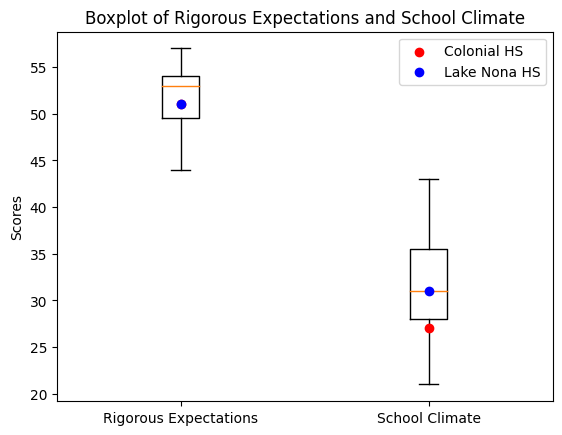

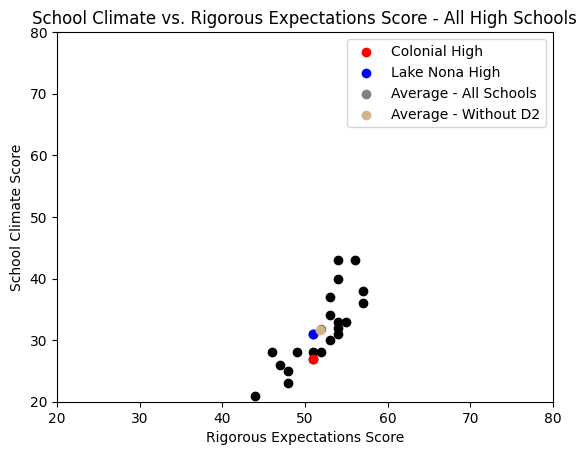

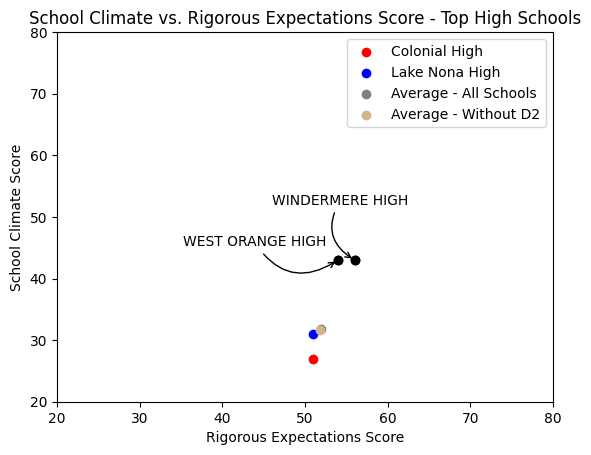

                            OLS Regression Results                            
Dep. Variable:         School Climate   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     38.41
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           4.70e-06
Time:                        02:57:01   Log-Likelihood:                -58.497
No. Observations:                  22   AIC:                             121.0
Df Residuals:                      20   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -39.76

In [59]:
plt.style.use('default')

#Boxplot for Rigorous Expectations
plt.boxplot([df['Rigorous Expectations'].dropna(), df['School Climate'].dropna()], labels=['Rigorous Expecations', 'School Climate'], vert=True)
plt.title('Boxplot of Rigorous Expectations and School Climate')
plt.scatter(1, colonial_hs['Rigorous Expectations'], color='red', zorder=5, label="Colonial HS")
plt.scatter(1, lake_nona_hs['Rigorous Expectations'], color='blue', zorder=5, label="Lake Nona HS")
plt.scatter(2, colonial_hs['School Climate'], color='red', zorder=5)
plt.scatter(2, lake_nona_hs['School Climate'], color='blue', zorder=5)
plt.legend()
plt.ylabel('Scores')
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score
plt.scatter(df['Rigorous Expectations'],
            df['School Climate'],
            c='black')
plt.scatter(colonial_hs['Rigorous Expectations'],
            colonial_hs['School Climate'],
            c='red',
            label='Colonial High')
plt.scatter(colonial_hs['Rigorous Expectations'],
            lake_nona_hs['School Climate'],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
plt.title('School Climate vs. Rigorous Expectations Score - All High Schools')
plt.xlabel('Rigorous Expectations Score')
plt.ylabel('School Climate Score')
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score (Scores above 50)
texts = []
for x in df.index:
    if df.loc[x, 'Rigorous Expectations'] > 50 and df.loc[x, 'School Climate'] > 40:
        plt.scatter(df.loc[x, 'Rigorous Expectations'], df.loc[x, 'School Climate'], color="black")
      #  texts.append(plt.text(df.loc[x, 'Rigorous Expectations'], df.loc[x, 'School Climate'], df.loc[x, 'Name'],
                     #         fontsize=9, ha='right', va='bottom'))
plt.scatter(colonial_hs['Rigorous Expectations'],
            colonial_hs['School Climate'],
            c='red',
            label='Colonial High')
plt.scatter(lake_nona_hs['Rigorous Expectations'],
            lake_nona_hs['School Climate'],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
top_points = df[(df['Rigorous Expectations'] > 50) & (df['School Climate'] > 40)]
offsets = [(-60, 10), (-10, 40)]  # Different offsets for each point
for idx, (offset, row) in enumerate(zip(offsets, top_points.iterrows())):
    row = row[1]
    plt.scatter(row['Rigorous Expectations'], row['School Climate'], color='black')
    plt.annotate(
        row['Name'],
        (row['Rigorous Expectations'], row['School Climate']),
        textcoords="offset points",
        xytext=offset,  # Adjust this to move the label to a desired position
        ha='center',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black')
    )
plt.title('School Climate vs. Rigorous Expectations Score - Top High Schools')
plt.xlabel('Rigorous Expectations Score')plt.style.use('default')

#Boxplot for Rigorous Expectations
plt.boxplot([df['Rigorous Expectations'].dropna(), df['School Climate'].dropna()], labels=['Rigorous Expectations','School Climate'], vert=True)
plt.title('Boxplot of Rigorous Expectations and School Climate')
plt.scatter(1, colonial_hs['Rigorous Expectations'], color='red', zorder=5, label="Colonial HS")
plt.scatter(1, lake_nona_hs['Rigorous Expectations'], color='blue', zorder=5, label="Lake Nona HS")
plt.scatter(2, colonial_hs['School Climate'], color='red', zorder=5)
plt.scatter(2, lake_nona_hs['School Climate'], color='blue', zorder=5)
plt.legend()
plt.ylabel('Scores')
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score
plt.scatter(df['Rigorous Expectations'],
            df['School Climate'],
            c='black')
plt.scatter(colonial_hs['Rigorous Expectations'],
            colonial_hs['School Climate'],
            c='red',
            label='Colonial High')
plt.scatter(colonial_hs['Rigorous Expectations'],
            lake_nona_hs['School Climate'],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
plt.title('School Climate vs. Rigorous Expectations Score - All High Schools')
plt.xlabel('Rigorous Expectations Score')
plt.ylabel('School Climate Score')
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score (Scores above 50)
texts = []
for x in df.index:
    if df.loc[x, 'Rigorous Expectations'] > 50 and df.loc[x, 'School Climate'] > 40:
        plt.scatter(df.loc[x, 'Rigorous Expectations'], df.loc[x, 'School Climate'], color="black")
      #  texts.append(plt.text(df.loc[x, 'Rigorous Expectations'], df.loc[x, 'School Climate'], df.loc[x, 'Name'],
                     #         fontsize=9, ha='right', va='bottom'))
plt.scatter(colonial_hs['Rigorous Expectations'],
            colonial_hs['School Climate'],
            c='red',
            label='Colonial High')
plt.scatter(lake_nona_hs['Rigorous Expectations'],
            lake_nona_hs['School Climate'],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
top_points = df[(df['Rigorous Expectations'] > 50) & (df['School Climate'] > 40)]
offsets = [(-60, 10), (-10, 40)]  # Different offsets for each point
for idx, (offset, row) in enumerate(zip(offsets, top_points.iterrows())):
    row = row[1]
    plt.scatter(row['Rigorous Expectations'], row['School Climate'], color='black')
    plt.annotate(
        row['Name'],
        (row['Rigorous Expectations'], row['School Climate']),
        textcoords="offset points",
        xytext=offset,  # Adjust this to move the label to a desired position
        ha='center',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black')
    )
plt.title('School Climate vs. Rigorous Expectations Score - Top High Schools')
plt.xlabel('Rigorous Expectations Score')
plt.ylabel('School Climate Score')
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# OLS Regression between Rigorous Expectations and School Climate
y = df['School Climate']
X = df['Rigorous Expectations']

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# OLS Regression between Rigorous Expectations and School Climate
y = df['School Climate']
X = df['Rigorous Expectations']

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
plt.style.use('default')
xinput = xinput
yinput = yinput

#Boxplot for Rigorous Expectations
plt.boxplot([df[xinput].dropna(), df[yinput].dropna()], labels=[xinput, yinput], vert=True)
plt.title('Boxplot of Rigorous Expectations and School Climate')
plt.scatter(1, colonial_hs[xinput], color='red', zorder=5, label="Colonial HS")
plt.scatter(1, lake_nona_hs[xinput], color='blue', zorder=5, label="Lake Nona HS")
plt.scatter(2, colonial_hs[yinput], color='red', zorder=5)
plt.scatter(2, lake_nona_hs[yinput], color='blue', zorder=5)
plt.legend()
plt.ylabel('Scores')
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score
plt.scatter(df[xinput],
            df[yinput],
            c='black')
plt.scatter(colonial_hs[xinput],
            colonial_hs[yinput],
            c='red',
            label='Colonial High')
plt.scatter(colonial_hs[xinput],
            lake_nona_hs[yinput],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
plt.title('School Climate vs. Rigorous Expectations Score - All High Schools')
plt.xlabel('Rigorous Expectations Score')
plt.ylabel('School Climate Score')
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score (Scores above 50)
texts = []
for x in df.index:
    if df.loc[x, xinput] > 50 and df.loc[x, yinput] > 40:
        plt.scatter(df.loc[x, xinput], df.loc[x, yinput], color="black")
      #  texts.append(plt.text(df.loc[x, xinput], df.loc[x, yinput], df.loc[x, 'Name'],
                     #         fontsize=9, ha='right', va='bottom'))
plt.scatter(colonial_hs[xinput],
            colonial_hs[yinput],
            c='red',
            label='Colonial High')
plt.scatter(lake_nona_hs[xinput],
            lake_nona_hs[yinput],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
top_points = df[(df[xinput] > 50) & (df[yinput] > 40)]
offsets = [(-60, 10), (-10, 40)]  # Different offsets for each point
for idx, (offset, row) in enumerate(zip(offsets, top_points.iterrows())):
    row = row[1]
    plt.scatter(row[xinput], row[yinput], color='black')
    plt.annotate(
        row['Name'],
        (row[xinput], row[yinput]),
        textcoords="offset points",
        xytext=offset,  # Adjust this to move the label to a desired position
        ha='center',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black')
    )
plt.title('School Climate vs. Rigorous Expectations Score - Top High Schools')
plt.xlabel('Rigorous Expectations Score')plt.style.use('default')

#Boxplot for Rigorous Expectations
plt.boxplot([df[xinput].dropna(), df[yinput].dropna()], labels=[xinput,yinput], vert=True)
plt.title('Boxplot of Rigorous Expectations and School Climate')
plt.scatter(1, colonial_hs[xinput], color='red', zorder=5, label="Colonial HS")
plt.scatter(1, lake_nona_hs[xinput], color='blue', zorder=5, label="Lake Nona HS")
plt.scatter(2, colonial_hs[yinput], color='red', zorder=5)
plt.scatter(2, lake_nona_hs[yinput], color='blue', zorder=5)
plt.legend()
plt.ylabel('Scores')
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score
plt.scatter(df[xinput],
            df[yinput],
            c='black')
plt.scatter(colonial_hs[xinput],
            colonial_hs[yinput],
            c='red',
            label='Colonial High')
plt.scatter(colonial_hs[xinput],
            lake_nona_hs[yinput],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
plt.title('School Climate vs. Rigorous Expectations Score - All High Schools')
plt.xlabel('Rigorous Expectations Score')
plt.ylabel('School Climate Score')
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# All High Schools - School Climate vs. Rigor Expectations Score (Scores above 50)
texts = []
for x in df.index:
    if df.loc[x, xinput] > 50 and df.loc[x, yinput] > 40:
        plt.scatter(df.loc[x, xinput], df.loc[x, yinput], color="black")
      #  texts.append(plt.text(df.loc[x, xinput], df.loc[x, yinput], df.loc[x, 'Name'],
                     #         fontsize=9, ha='right', va='bottom'))
plt.scatter(colonial_hs[xinput],
            colonial_hs[yinput],
            c='red',
            label='Colonial High')
plt.scatter(lake_nona_hs[xinput],
            lake_nona_hs[yinput],
            c='blue',
            label='Lake Nona High')
plt.scatter(hs['avg_rigor_notd2'],
            hs['avg_schoolclimate_notd2'],
            color='grey',
            label='Average - All Schools')
plt.scatter(hs['avg_rigor'],
            hs['avg_schoolclimate'],
            color='tan',
            label='Average - Without D2')
top_points = df[(df[xinput] > 50) & (df[yinput] > 40)]
offsets = [(-60, 10), (-10, 40)]  # Different offsets for each point
for idx, (offset, row) in enumerate(zip(offsets, top_points.iterrows())):
    row = row[1]
    plt.scatter(row[xinput], row[yinput], color='black')
    plt.annotate(
        row['Name'],
        (row[xinput], row[yinput]),
        textcoords="offset points",
        xytext=offset,  # Adjust this to move the label to a desired position
        ha='center',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black')
    )
plt.title('School Climate vs. Rigorous Expectations Score - Top High Schools')
plt.xlabel('Rigorous Expectations Score')
plt.ylabel('School Climate Score')
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# OLS Regression between Rigorous Expectations and School Climate
y = df[yinput]
X = df[xinput]

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()

# OLS Regression between Rigorous Expectations and School Climate
y = df[yinput]
X = df[xinput]

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


The graphs and statistical regression above tell the following:
* Among high schools, Colonial and Lake Nona rank within the lowest 25% of **Rigorous Expectation** scores, and there is no difference between the two schools.

* Among high schools, Colonial ranks in the lowest 25% of **School Climate** scores, while Lake Nona ranks in the middle 50% of **School Climate** scores (very close to the mean/average score). There is a difference of about 5 points between both schools.

* School Climate scores and rigorous expectation scores are **strongly correlated** (R=0.811171992), suggesting that there is an positive association between schools with a good climate and schools that set rigorous expectations.
** On average, every 1 point increase in School Climate, Rigorous Expectations increases by 1.3758.
** There are multiple factors other than Rigorous Expectations influencing School Climate scores, and vice versa. 65.8% of the variability in School Climate is accounted for by Rigorous Expectations, meaning the remaining 34.2% of the variability is due to other factors.

## Self-Management and/vs Sense of Belonging